# E_commerce

## 1. Pozivanje biblioteka

In [54]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3


from pylab import rcParams
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.metrics import silhouette_score
from datetime import datetime
from time import time
from time import sleep
import time
from random import random
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D

In [55]:
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

## 2. Procesiranje podataka

In [56]:
data = pd.read_csv('data.csv', encoding ='latin1')

In [57]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [58]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


##### Kolone:

##### InvoiceNo - broj računa
##### StockCode - šifra proizvoda
##### Description - naziv proizvoda
##### Quantity - količina
##### InvoiceDate - datum kupovine
##### UnitPrice - cena po komadu
##### CustomerID - šifra kupca
##### Country - država

In [59]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [60]:
data.shape

(541909, 8)

###### Skup podataka sadrzi 541.909 redova i 8 kolona.

In [61]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

#### Kolona 'InvoiceDate' nije definisana kao datum, pomocu funkcije to_datetime formatiracemo kolonu 'InvoiceDate' u datum.

In [62]:
data ['InvoiceDate'] = pd.to_datetime (data['InvoiceDate'], infer_datetime_format=True)

In [63]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [64]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

##### Pozivanjem funkcije isnull vrsi se provera nedostajucih vrednosti. Zakljucujemo da postoje nedostajuce vrednosti u kolonama 'Description' i 'CustomerID'. Nedostajuce vrednosti ce biti popunjene srednjom ili najcesce koriscenom vrednoscu ili ce kolone biti izbrisane.

In [65]:
data['CustomerID'].nunique()  

4372

In [66]:
data['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [67]:
data['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

## 3. Priprema podataka

### 3.1. Nedostajuce vrednosti

In [68]:
data = data[data['CustomerID'].notnull()]

###### Nedostajuce vrednosti se prvo brisu koriscenjem funkcije notnull, koja ce izbrisati podatke za koje nemamo sifru klijenta.

In [69]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

##### Nakon sto je funkcija notnull izbrisala podatke, ponovo pozivamo funkciju isnull da proverimo nedostajuce vrednosti. Zakljucujemo da nema vise nedostajucih vrednosti.

### 3.2. Negativne vrednosti

In [70]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


###### Pozivanjem funkcije describe, dobija se tabela deskriptivne statistike podataka. Iz tabele smo zakljucili da kolone 'Quantity' i 'UnitPrice' imaju negativne vrednosti, te vrednosti ne smeju ostati negativne pa cemo definisati da se samo  uzimaju podaci koji su veci od nule. Prosecna kolicina iznos 12.06, prosecna cena iznosi 3.46. Negativne vrednosti mogu da predstavljaju neke poklone koje je firma delila lojalnim kupcima, ili neki gubitak, otkazane transakcije.

In [71]:
data[(abs(data.Quantity)>6000)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


In [72]:
data = data.drop(data[data.Quantity==74215].index).reset_index(drop=True)

In [73]:
data = data.drop(data[data.Quantity==12540].index).reset_index(drop=True)

In [74]:
data = data.drop(data[data.Quantity==80995].index).reset_index(drop=True)

In [75]:
data = data[data['Quantity'] > 0]

In [76]:
data = data[data['UnitPrice'] > 0]

In [77]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,397882.000000,397882.000000,397882.000000
mean,12.598213,3.116496,15294.427969
std,42.886003,22.097932,1713.138517
min,1.000000,0.001000,12347.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,4800.000000,8142.750000,18287.000000


###### Podaci su sada u okviru normale, iako je u koloni 'UnitPrice' veoma mali broj ostavicemo tako jer postoji mogucnost da je proizvod bio na akciji i dobio se gratis. Prosecna koliicina je sada 12.99, prosecna cena je 3.12.

### 3.3. Kalkulacija ukupne cene

In [78]:
data['TotalPrice'] = data['Quantity']*data['UnitPrice']

In [79]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### 3.4. Agregacija podataka

In [80]:
prepared_data = data.groupby('CustomerID').agg({'InvoiceNo': 'nunique',
                                                'TotalPrice': 'sum',
                                                'InvoiceDate': ['min', 'max'] ,
                                                'UnitPrice' : ['min', 'max', 'mean']
                                               })    

In [81]:
prepared_data.reset_index(inplace=True)

#### Definisacemo indeks, ne zelimo da nam 'Customer ID' bude i indeks, zelimo da ga odvojimo.

In [82]:
prepared_data.columns = ['CustomerID', 'Frequency',
                         'MonetaryValue', 'FirstPurchase',
                         'LastPurchase', 'MinUnit', 
                         'MaxUnit', 'MeanUnit']

In [83]:
prepared_data['ObvservationDate'] = pd.to_datetime('2011-12-10')

#### Datum na osnovu kojeg cemo da racunamo koliko dana je proteklo od prve i poslednje kupovine, bice dan nakon poslednje kupovine.

In [84]:
prepared_data['Tenure'] = (prepared_data['ObvservationDate'] - prepared_data['FirstPurchase']).dt.days

#### Kolona 'Tenure' nam pokazuje koliko dana je proslo od prve kupovine.

In [85]:
prepared_data['Recency'] = (prepared_data['ObvservationDate'] - prepared_data['LastPurchase']).dt.days

#### Kolona 'Recency' nam pokazuje koliko dana je proslo od poslednje kupovine.

In [86]:
prepared_data.head()

,CustomerID,Frequency,MonetaryValue,FirstPurchase,LastPurchase,MinUnit,MaxUnit,MeanUnit,ObvservationDate,Tenure,Recency
0,12347.0,7,4310.00,2010-12-07 14:57:00,2011-12-07 15:52:00,0.25,12.75,2.644011,2011-12-10,367,2
1,12348.0,4,1797.24,2010-12-16 19:09:00,2011-09-25 13:13:00,0.29,40.00,5.764839,2011-12-10,358,75
2,12349.0,1,1757.55,2011-11-21 09:51:00,2011-11-21 09:51:00,0.42,300.00,8.289041,2011-12-10,18,18
3,12350.0,1,334.40,2011-02-02 16:01:00,2011-02-02 16:01:00,0.85,40.00,3.841176,2011-12-10,310,310
4,12352.0,8,2506.04,2011-02-16 12:33:00,2011-11-03 14:37:00,0.65,376.50,15.930706,2011-12-10,296,36


### 3.5. Izbor kolona za modelovanje

In [87]:
prepared_data = prepared_data[['CustomerID', 'Frequency', 'MonetaryValue', 'Tenure', 'Recency','MinUnit', 
                         'MaxUnit', 'MeanUnit']]

In [88]:
prepared_data.head()

,CustomerID,Frequency,MonetaryValue,Tenure,Recency,MinUnit,MaxUnit,MeanUnit
0,12347.0,7,4310.00,367,2,0.25,12.75,2.644011
1,12348.0,4,1797.24,358,75,0.29,40.00,5.764839
2,12349.0,1,1757.55,18,18,0.42,300.00,8.289041
3,12350.0,1,334.40,310,310,0.85,40.00,3.841176
4,12352.0,8,2506.04,296,36,0.65,376.50,15.930706


In [89]:
prepared_data.describe()

,CustomerID,Frequency,MonetaryValue,Tenure,Recency,MinUnit,MaxUnit,MeanUnit
count,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000
mean,15301.089232,4.272539,1998.098848,222.807471,92.053032,1.447340,26.088593,4.468515
std,1721.422291,7.698808,8551.826038,117.857944,99.966159,32.846312,178.229051,34.215360
min,12347.000000,1.000000,2.900000,0.000000,0.000000,0.001000,0.170000,0.122500
25%,13814.000000,1.000000,307.090000,112.000000,17.000000,0.210000,8.250000,2.203913
50%,15300.000000,2.000000,673.260000,248.000000,50.000000,0.390000,12.750000,2.917778
75%,16779.000000,5.000000,1661.330000,326.000000,142.000000,0.650000,16.950000,3.830000
max,18287.000000,209.000000,280206.020000,373.000000,373.000000,2033.100000,8142.750000,2033.100000


## 4. Vizualizacija 

### 4.1. Histogram

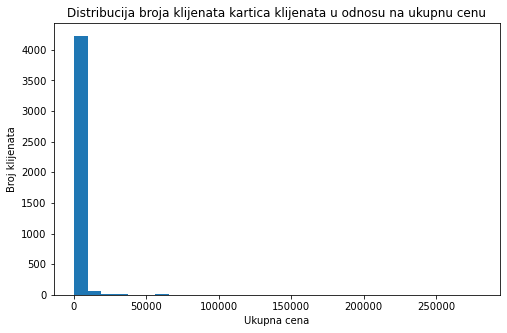

In [90]:
plt.figure(figsize=[8,5])    
plt.hist(prepared_data['MonetaryValue'],bins=30)  

plt.ylabel('Broj klijenata')  
plt.xlabel('Ukupna cena') 
plt.title('Distribucija broja klijenata kartica klijenata u odnosu na ukupnu cenu');

#### Na osnovu histrograma zakljucujemo da najveci broj klijenta kupuje proizvode cija je cena do 10.000.

### 4.2. Distplot

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Tenure', ylabel='Density'>

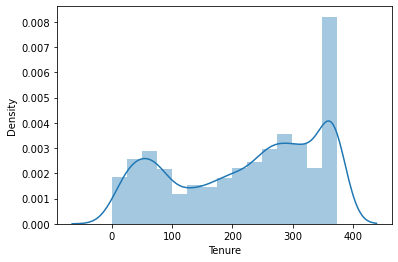

In [91]:
sns.distplot(prepared_data['Tenure'])

###### Na osnovu grafika mozemo zakljuciti da podaci ne slede normalan raspored. U znatnoj meri dominiraju klijenti kod kojih je proslo priblizno 350 dana od prve kupovine, u odnosu na druge klijente. Dominiraju stari kupci.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Recency', ylabel='Density'>

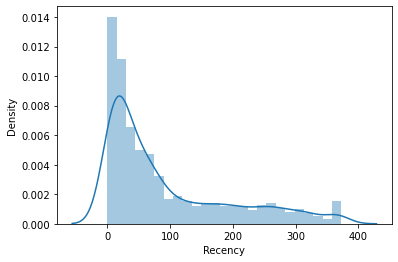

In [92]:
sns.distplot(prepared_data['Recency'])

###### Na osnovu grafika mozemo zakljuciti da podaci ne slede normalan raspored, kod najveceg broja klijenata je proslo do 100 dana od poslednje kupovine. Dominiraju lojalni kupci.

### 4.3. Boxplot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(28, 0, '29'),
  Text(29, 0, '30'),
  Text(30, 0, '31'),
  Text(31, 0, '32'),
  Text(32, 0, '33'),
  Text(33, 0, '34'),
  Text(34, 0, '35'),
  Text(35, 0, 

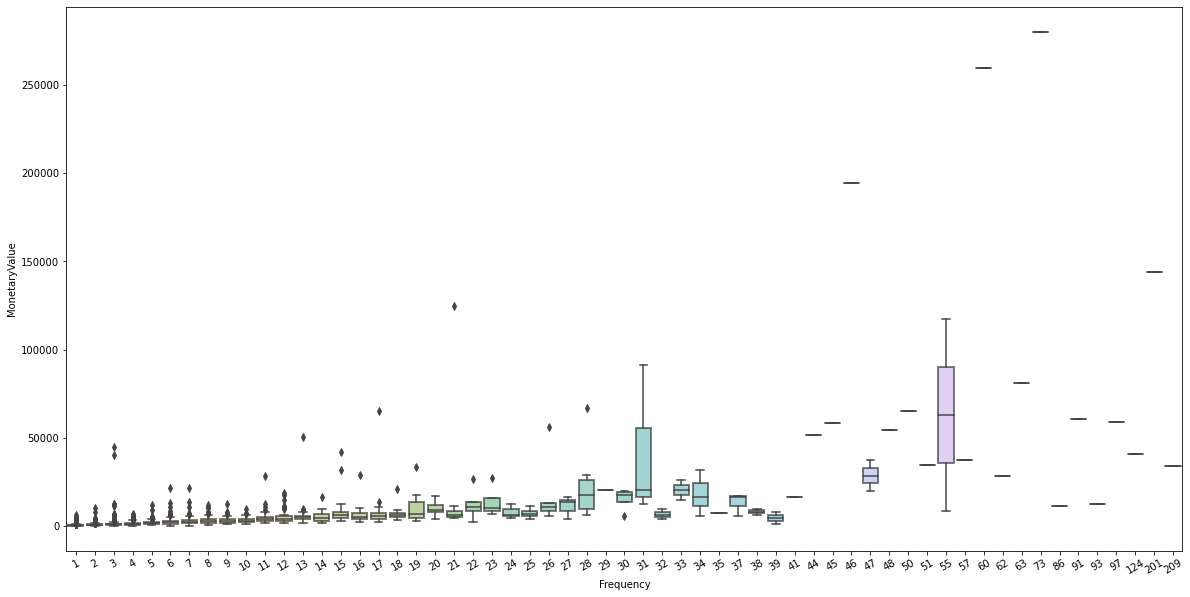

In [93]:
plt.figure(figsize = (20, 10))
ax = sns.boxplot(x='Frequency', y='MonetaryValue', data=prepared_data)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=30)

#### Boxplot nam pokazuje frekvenciju u odnosu na monetarnu vrednost. Pokazuje nam da li imamo potencijalne i prave outlier-e.
##### Na grafiku vidimo da imamo dosta outlier-a. Frekvencije od 3 do 13 imaju potencijalne outlier-e i mali broj pravih outliera-a, dok frekvencije od 15 do 28 ima prave outlier-e.

### 4.4. Brisanje outlier-a

In [94]:
Q1 = prepared_data.quantile(0.25)
Q3 = prepared_data.quantile(0.75)
IQR = Q3 - Q1

In [95]:
((prepared_data > (Q1 + 1.5 * IQR))).sum()

CustomerID        17
Frequency        557
MonetaryValue    752
Tenure             0
Recency          721
MinUnit          552
MaxUnit          561
MeanUnit         609
dtype: int64

In [96]:
median2 = prepared_data.loc[prepared_data['Frequency']<5.000000, 'Frequency'].median()
prepared_data.loc[prepared_data.Frequency > 5.000000, 'Frequency'] = np.nan
prepared_data.fillna(median2,inplace=True)

In [97]:
median = prepared_data.loc[prepared_data['MonetaryValue']<1661.330000, 'MonetaryValue'].median()
prepared_data.loc[prepared_data.MonetaryValue > 1661.330000, 'MonetaryValue'] = np.nan
prepared_data.fillna(median,inplace=True)

In [98]:
((prepared_data > (Q1 + 1.5 * IQR))).sum()

CustomerID        17
Frequency          0
MonetaryValue      0
Tenure             0
Recency          721
MinUnit          552
MaxUnit          561
MeanUnit         609
dtype: int64

#### Zbog velikog broja outlier-a i velike razlike izmedju 75. percentila i maksimalne vrednosti izbrisali smo outlier-e i zamenili njihove vrednosti, medijanom.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0')])

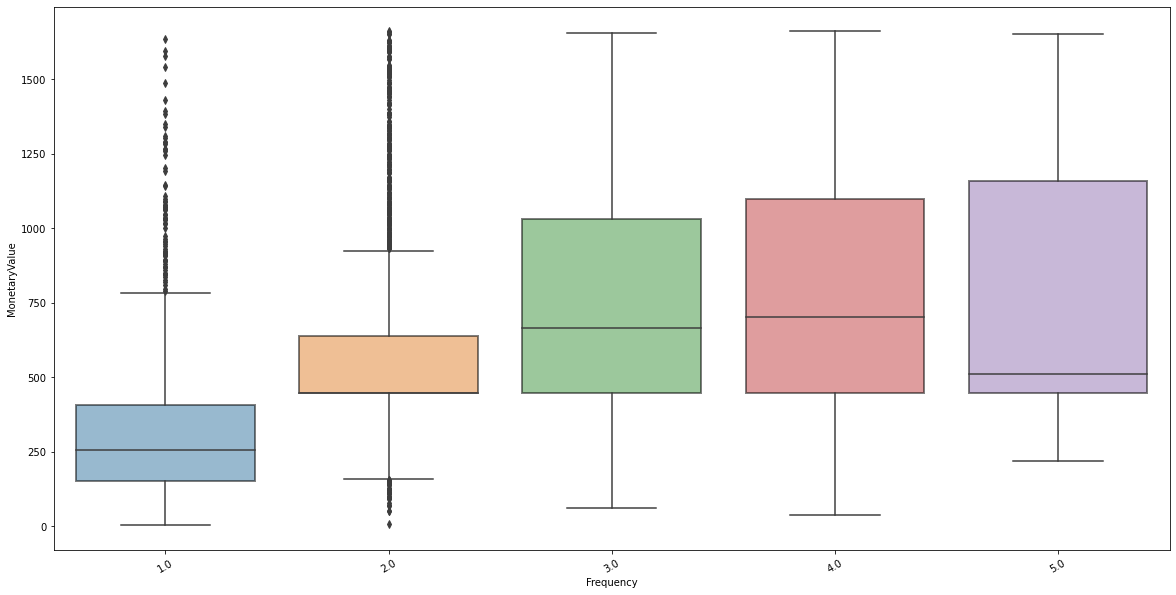

In [99]:
plt.figure(figsize = (20, 10))
ax = sns.boxplot(x='Frequency', y='MonetaryValue', data=prepared_data)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=30)

## 5. Modelovanje resenja:  RFMT clustering


### 5.1.  Normalizacija podataka

In [100]:
scaler = MinMaxScaler(feature_range=(-1,1))

In [101]:
scaler.fit(prepared_data[['Recency', 'Frequency', 'MonetaryValue', 'Tenure',
                         'MinUnit', 
                         'MaxUnit', 'MeanUnit']])

MinMaxScaler(feature_range=(-1, 1))

In [1200]:
normalized_data = scaler.transform(prepared_data[['Recency', 'Frequency', 'MonetaryValue', 'Tenure',
                                                  'MinUnit','MaxUnit', 'MeanUnit']])

## Verzija 1: K means clustering

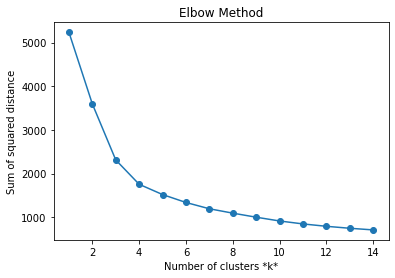

In [1264]:
sse = []

for k in range(1, 15):
    km = KMeans(n_clusters=k)
    km.fit(normalized_data)
    sse.append(km.inertia_)

plt.plot(range(1, 15), sse, '-o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters *k*')
plt.ylabel('Sum of squared distance');

#### Broj klastera odredjujemo na osnovu krive, zakljucujemo da nakon 8. klastera kriva pocinje da se ravna, tako da cemo izabrati 8 klastera.

In [1278]:
model = KMeans(n_clusters=8)

In [1279]:
model.fit(normalized_data)

KMeans()

In [1280]:
centroids = model.cluster_centers_

In [1281]:
centroids = scaler.inverse_transform(centroids)

In [1282]:
centroids_data = pd.DataFrame(centroids, columns=['Recency', 'Frequency', 'MonetaryValue', 'Tenure',
                                                  'MinUnit','MaxUnit', 'MeanUnit'
                                                 ])

In [1283]:
prepared_data['KMeans_Cluster_id'] = model.labels_

In [1284]:
prepared_data.head()

,CustomerID,Frequency,MonetaryValue,Tenure,Recency,MinUnit,MaxUnit,MeanUnit,KMeans_Cluster_id,Affinity_Cluster_id,AgglomerativeClustering_id
0,12347.0,2.0,447.43,367,2,0.25,12.75,2.644011,3,43,74
1,12348.0,4.0,447.43,358,75,0.29,40.00,5.764839,1,1,3
2,12349.0,1.0,447.43,18,18,0.42,300.00,8.289041,0,62,62
3,12350.0,1.0,334.40,310,310,0.85,40.00,3.841176,2,35,196
4,12352.0,2.0,447.43,296,36,0.65,376.50,15.930706,3,25,165


In [1285]:
prepared_data['KMeans_Cluster_id'].value_counts()

3    1017
0     812
5     557
2     527
7     480
4     364
1     360
6     220
Name: KMeans_Cluster_id, dtype: int64

#### Pozivanjem ove funkcije dobijamo broj transakcija koji sadrzi svaki klaster. 

In [1286]:
# Analiza klastera br. 3
cl3 = prepared_data[prepared_data["KMeans_Cluster_id"] == 3]
cl3.describe()

,CustomerID,Frequency,MonetaryValue,Tenure,Recency,MinUnit,MaxUnit,MeanUnit,KMeans_Cluster_id,Affinity_Cluster_id,AgglomerativeClustering_id
count,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.0,1017.000000,1017.000000
mean,15324.395280,2.136676,463.070434,325.977384,35.147493,0.374229,48.062625,3.879966,3.0,48.302852,88.505408
std,1731.872465,0.343675,109.447161,45.381242,39.996849,0.425497,327.245200,14.112137,0.0,18.164079,57.919679
min,12347.000000,2.000000,52.200000,192.000000,0.000000,0.001000,0.170000,0.170000,3.0,6.000000,6.000000
25%,13854.000000,2.000000,447.430000,288.000000,7.000000,0.190000,9.950000,2.337615,3.0,42.000000,50.000000
50%,15290.000000,2.000000,447.430000,337.000000,19.000000,0.290000,12.750000,2.906667,3.0,43.000000,74.000000
75%,16863.000000,2.000000,447.430000,366.000000,50.000000,0.420000,18.000000,3.712821,3.0,63.000000,149.000000
max,18283.000000,3.000000,962.390000,373.000000,199.000000,8.500000,8142.750000,426.810000,3.0,83.000000,202.000000


#### Klaster 3 obuhvata 1017 transakcija, posmatracemo ga zato sto je to klaster koji ima najvise transakcija. Prosecna frekvencija je 2.14 prosecna monetarna vrednost iznosi 463.07, prosecni broj dana koji su protekli od prve kupovine je 326 a od poslednje 35. Prosecna minimalna cena iznosi 0.37 a prosecna maksimalna cena iznosi 48.06.

In [1287]:
# Analiza klastera br. 6
cl6 = prepared_data[prepared_data["KMeans_Cluster_id"] == 6]
cl6.describe()

,CustomerID,Frequency,MonetaryValue,Tenure,Recency,MinUnit,MaxUnit,MeanUnit,KMeans_Cluster_id,Affinity_Cluster_id,AgglomerativeClustering_id
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.0,220.000000,220.000000
mean,15398.818182,4.436364,1275.015773,276.654545,47.495455,0.380273,16.312727,3.042453,6.0,35.359091,97.668182
std,1532.535269,0.497065,218.244026,80.025046,54.925728,0.315768,23.539538,1.291191,0.0,20.892269,58.826608
min,12364.000000,4.000000,909.230000,44.000000,0.000000,0.040000,1.650000,0.675750,6.0,12.000000,7.000000
25%,14278.000000,4.000000,1078.777500,232.250000,12.000000,0.190000,9.950000,2.159645,6.0,16.000000,63.000000
50%,15409.000000,4.000000,1268.175000,289.500000,27.000000,0.290000,12.750000,2.791807,6.0,29.000000,96.000000
75%,16642.000000,5.000000,1446.352500,337.250000,60.000000,0.420000,16.950000,3.646792,6.0,55.000000,122.000000
max,18239.000000,5.000000,1661.060000,373.000000,366.000000,2.550000,293.000000,12.147805,6.0,76.000000,220.000000


#### Klaster 6 obuhvata 220 transakciju, posmatracemo ga zato sto je to klaster koji ima najmanje transakcija. Prosecna frekvencija je 4.44 prosecna monetarna vrednost iznosi 1275.02, prosecni broj dana koji su protekli od prve kupovine je 277 a od poslednje 47. Prosecna minimalna cena iznosi 0.38 a prosecna maksimalna cena iznosi 16.31.

In [1275]:
label = km.labels_

In [1276]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(normalized_data, km.labels_, metric='euclidean'))

Silhouette Coefficient: 0.363


Text(0.5, 0.92, 'Without connectivity constraints (time %.2fs)')

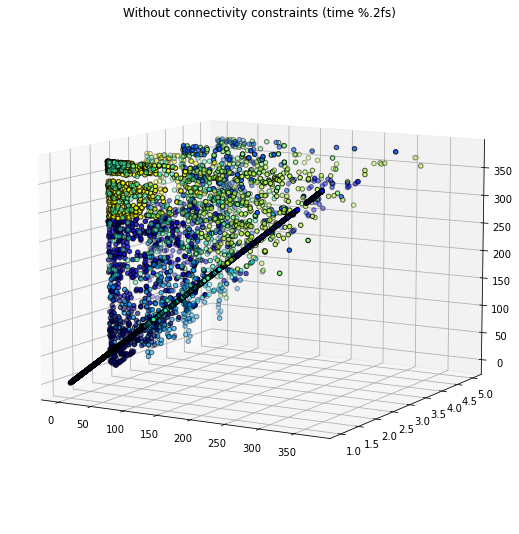

In [1261]:
fig = plt.figure(figsize=(10,7))
ax = p3.Axes3D(fig)
ax.view_init(10, -60)
for l in np.unique(label):
    ax.scatter(prepared_data[prepared_data['KMeans_Cluster_id'] == l]['Recency'],
               prepared_data[prepared_data['KMeans_Cluster_id'] == l]['Frequency'],
               prepared_data[prepared_data['KMeans_Cluster_id'] == l]['Tenure'],
               color=plt.cm.jet(float(l) / np.max(label + 1)),
               s=20, edgecolor='k')
plt.title('Without connectivity constraints (time %.2fs)')

#### Na osnovu provere ugla posmatranja, zakljucujemo da se pod uglom od -60 najrelevantnije vidi kako su grupisani klasteri.

## Zakljucak
##### Podaci su klasterizovani u 10 klastera. Svaki klaster podrazumeva odredjene karakteristike na osnovu kojih su podaci dodeljeni tom klasteru.
##### Pocetnici ( klaster 0 ): Klijenti imaju do 2 racuna, monetarna vrednost se krece do 1000, vreme koje je proteklo od prve kupovine je do 100 dana, takodje i vreme koje je proteklo od poslednje kupovine je do 100 dana. Zakljucujemo da su to novi kupci koji su jednom obavili kupovinu ili nisu redovni. Rec je o kupcima koji kupuju uglavnom proizvode srednjih cena. 
##### Verni ( klaster 1 ): Klijenti imaju od 4 do 5 racuna, monetarna vrednost iznosi od 400 do 800, vreme koje je proteklo od prve kupovine je izmedju 100 i 400 dana, vreme koje je proteklo od poslednje kupovine je izmedju 10 i 100 dana. Zakljucujemo da su to stari i redovni kupci. Rec je o kupcima koji kupuju uglavnom proizvode srednjih cena. 
#####  Uspavani ( klaster 2 ): Klijenti imaju do 2 racuna, monetarna vrednost se krece izmedju 100 i 500, vreme koje je proteklo od prve kupovine je izmedju 250 i 400 dana, vreme koje je proteklo od poslednje kupovine je izmedju 250 i 400 dana. Zakljucujemo da su to stari kupci koji su jednom obavili kupovinu ili nisu redovni. Rec je o kupcima koji kupuju uglavnom skupe proizvode. 
##### Lojalni ( klaster 3 ): Klijenti imaju 2 racuna, monetarna vrednost se krece izmedju 400 i 500, vreme koje je proteklo od prve kupovine je izmedju 250 i 300 dana, vreme koje je proteklo od poslednje kupovine je od 0 do 100 dana. Zakljucujemo da su to stari i redovni kupci. Rec je o kupcima koji kupuju uglavnom skupe proizvode. 
##### Domaci ( klaster 4 ): Klijenti imaju od 2 do 3 racuna, monetarna vrednost iznosi od 800 do 1.500, vreme koje je proteklo od prve kupovine je izmedju 200 i 400 dana, vreme koje je proteklo od poslednje kupovine je do 100 dana. Zakljucujemo da su to stari i redovni kupci. Rec je o kupcima koji kupuju uglavnom proizvode srednjih cena. 
##### Potencijalni ( klaster 5 ): Klijenti imaju do 3 racuna, monetarna vrednost se krece izmedju 400 i 1.200, vreme koje je proteklo od prve kupovine je do 150 dana, vreme koje je proteklo od poslednje kupovine je do 100 dana. Zakljucujemo da su to novi kupci koji su jednom obavili kupovinu ili nisu redovni. Rec je o kupcima koji kupuju uglavnom proizvode srednjih cena. 
##### Redovni ( klaster 6 ): Klijenti imaju od 4 do 5 racuna, monetarna vrednost se krece od 1000 do 1.500, vreme koje je proteklo od prve kupovine je do 300 dana, vreme koje je proteklo od poslednje kupovine je do 70 dana. Zakljucujemo da su to stari i redovni kupci. Rec je o kupcima koji kupuju uglavnom jeftine. 
##### Zaboravljeni ( klaster 7 ): Klijenti imaju od 1 do 2 racuna, monetarna vrednost se krece do 500, vreme koje je proteklo od prve kupovine je izmedju 150 i 300 dana, vreme koje je proteklo od poslednje kupovine je izmedju 150 i 300 dana. Zakljucujemo da su to stari kupci koji su jednom obavili kupovinu ili nisu redovni. Zakljucujemo da su to stari i redovni kupci. Rec je o kupcima koji kupuju uglavnom jeftine. 

###### Silhouette Coefficient iznosi 0.363.

## Verzija 2: Affinity propagation

In [1215]:
af = AffinityPropagation(damping=0.8).fit(normalized_data)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


In [1216]:
cluster_centers_indices = af.cluster_centers_indices_

In [1217]:
cluster_centers = af.cluster_centers_

In [1218]:
num_of_clusters = af.labels_

In [1219]:
pd.DataFrame(num_of_clusters).value_counts()

43    355
39    165
67    145
78    140
25    139
     ... 
29     11
31     10
53      7
7       4
81      1
Length: 85, dtype: int64

#### Pozivanjem ove funkcije dobijamo broj transakcija koji sadrzi svaki klaster. 

In [1220]:
prepared_data['Affinity_Cluster_id'] = num_of_clusters

In [1221]:
prepared_data.head()

,CustomerID,Frequency,MonetaryValue,Tenure,Recency,MinUnit,MaxUnit,MeanUnit,KMeans_Cluster_id,Affinity_Cluster_id
0,12347.0,2.0,447.43,367,2,0.25,12.75,2.644011,1,43
1,12348.0,4.0,447.43,358,75,0.29,40.00,5.764839,4,1
2,12349.0,1.0,447.43,18,18,0.42,300.00,8.289041,2,62
3,12350.0,1.0,334.40,310,310,0.85,40.00,3.841176,3,35
4,12352.0,2.0,447.43,296,36,0.65,376.50,15.930706,1,25


In [1222]:
labels = af.labels_
n_clusters_ = len(cluster_centers_indices)

In [1296]:
# Analiza klastera br. 43
cl43 = prepared_data[prepared_data["Affinity_Cluster_id"] == 43]
cl43.describe()

,CustomerID,Frequency,MonetaryValue,Tenure,Recency,MinUnit,MaxUnit,MeanUnit,KMeans_Cluster_id,Affinity_Cluster_id,AgglomerativeClustering_id
count,355.000000,355.0,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.0,355.0,355.000000
mean,15383.400000,2.0,446.393296,366.050704,10.416901,0.294056,31.680901,3.058181,3.0,43.0,101.661972
std,1783.092628,0.0,46.910396,5.250528,8.970494,0.238981,104.416942,1.123131,0.0,0.0,45.459594
min,12347.000000,2.0,52.200000,351.000000,0.000000,0.040000,1.250000,0.652500,3.0,43.0,11.000000
25%,13842.500000,2.0,447.430000,362.000000,3.000000,0.120000,12.750000,2.359763,3.0,43.0,74.000000
50%,15356.000000,2.0,447.430000,367.000000,8.000000,0.210000,15.000000,2.826452,3.0,43.0,74.000000
75%,16993.000000,2.0,447.430000,371.000000,17.000000,0.390000,19.450000,3.489412,3.0,43.0,169.000000
max,18245.000000,2.0,734.940000,373.000000,33.000000,2.550000,1687.170000,10.332407,3.0,43.0,169.000000


#### Prvo smo posmatrali klaster koji ima najveci broj klijenata. Klaster 43 obuhvata 355 transakcija, prosecna frekvencija je 2.00, prosecna monetarna vrednost iznosi 446.39, prosecni broj dana koji su protekli od prve kupovine je 366 a od poslednje 10. Prosecna minimalna cena iznosi 0.29 a prosecna maksimalna cena iznosi 31.68.

In [1297]:
# Analiza klastera br. 25
cl25 = prepared_data[prepared_data["Affinity_Cluster_id"] == 25]
cl25.describe()

,CustomerID,Frequency,MonetaryValue,Tenure,Recency,MinUnit,MaxUnit,MeanUnit,KMeans_Cluster_id,Affinity_Cluster_id,AgglomerativeClustering_id
count,139.000000,139.0,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.0,139.0,139.000000
mean,15057.856115,2.0,445.241655,319.856115,15.510791,0.328129,26.994532,3.347698,3.0,25.0,97.618705
std,1799.010874,0.0,37.741116,12.904645,11.662753,0.265066,48.271537,2.060517,0.0,0.0,67.496473
min,12352.000000,2.0,201.120000,294.000000,0.000000,0.040000,1.790000,1.066222,3.0,25.0,8.000000
25%,13546.000000,2.0,447.430000,311.000000,6.000000,0.190000,12.500000,2.387632,3.0,25.0,8.000000
50%,15033.000000,2.0,447.430000,320.000000,12.000000,0.290000,14.950000,2.941667,3.0,25.0,149.000000
75%,16559.500000,2.0,447.430000,331.000000,24.000000,0.390000,19.950000,3.743797,3.0,25.0,149.000000
max,18283.000000,2.0,610.520000,339.000000,45.000000,1.850000,376.500000,17.120000,3.0,25.0,165.000000


#### Klaster 25 obuhvata 139 transakcija, prosecna frekvencija je 2.0, prosecna monetarna vrednost iznosi 445.24, prosecni broj dana koji su protekli od prve kupovine je 320 a od poslednje 15. Prosecna minimalna cena iznosi 0.38 a prosecna maksimalna cena iznosi 27.

In [1298]:
# Analiza klastera br. 81
cl81 = prepared_data[prepared_data["Affinity_Cluster_id"] == 81]
cl81.describe()

,CustomerID,Frequency,MonetaryValue,Tenure,Recency,MinUnit,MaxUnit,MeanUnit,KMeans_Cluster_id,Affinity_Cluster_id,AgglomerativeClustering_id
count,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,17846.0,1.0,447.43,85.0,85.0,2033.1,2033.1,2033.1,0.0,81.0,159.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,17846.0,1.0,447.43,85.0,85.0,2033.1,2033.1,2033.1,0.0,81.0,159.0
25%,17846.0,1.0,447.43,85.0,85.0,2033.1,2033.1,2033.1,0.0,81.0,159.0
50%,17846.0,1.0,447.43,85.0,85.0,2033.1,2033.1,2033.1,0.0,81.0,159.0
75%,17846.0,1.0,447.43,85.0,85.0,2033.1,2033.1,2033.1,0.0,81.0,159.0
max,17846.0,1.0,447.43,85.0,85.0,2033.1,2033.1,2033.1,0.0,81.0,159.0


###### Affinity propagation je definisao klaster 81 koji sadrzi samo jednog klijenta. Klijent je kupio skup proizvod.

In [1226]:
n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(normalized_data, labels, metric='euclidean'))

Estimated number of clusters: 85
Silhouette Coefficient: 0.349


Text(0.5, 0.92, 'Without connectivity constraints (time %.2fs)')

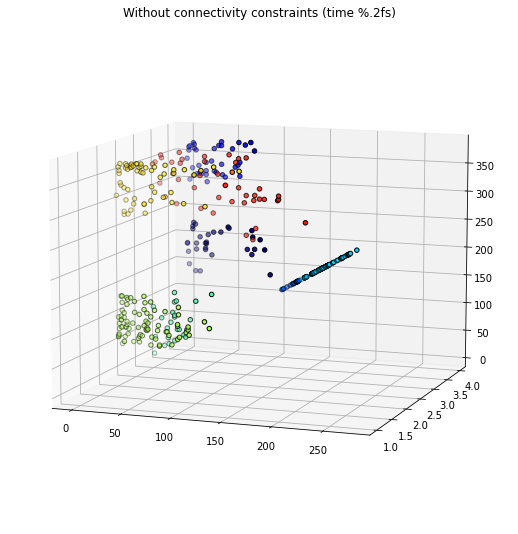

In [1227]:
fig = plt.figure(figsize=(10,7))
ax = p3.Axes3D(fig)
ax.view_init(10, -70)
for l in np.unique(label):
    ax.scatter(prepared_data[prepared_data['Affinity_Cluster_id'] == l]['Recency'],
               prepared_data[prepared_data['Affinity_Cluster_id'] == l]['Frequency'],
               prepared_data[prepared_data['Affinity_Cluster_id'] == l]['Tenure'],
               color=plt.cm.jet(float(l) / np.max(label + 1)),
               s=20, edgecolor='k')
plt.title('Without connectivity constraints (time %.2fs)')

#### Na osnovu provere ugla posmatranja, zakljucujemo da se pod uglom od -70 najrelevantnije vidi kako su grupisani klasteri.

## Zakljucak
##### Na osnovu sprovedene analize na bazi Affinity propagation klasterzacije došli smo da zaključka da su podaci klasterizovani u 85 klastera. 
##### Podaci su grupisani u više grupa u odnosu na K means klaseterizaciju ali poređenjem ove dve metode došli smo do zaključka da su iste klijente klasterizovali na isti način, razlika je tome što ih je Affinity propagation razložila na detaljnije klastere, odnosno outlere-e je smestio u posebne klastere.

###### Primenom Affinity propagation klasterizacije Silhouette Coefficient iznosi 0.349.

## Verzija 3: Hierarchical clustering

In [1228]:
ward = AgglomerativeClustering(n_clusters = None, linkage='ward',distance_threshold = 0.9).fit(normalized_data)

In [1229]:
n_clusters_ = ward.n_clusters_

In [1230]:
label = ward.labels_

In [1231]:
clusters__ = ward.labels_

In [1232]:
pd.DataFrame(clusters__).value_counts()

74     237
169    118
48      86
8       80
149     76
      ... 
35       2
163      1
159      1
131      1
123      1
Length: 226, dtype: int64

#### Pozivanjem ove funkcije dobijamo broj transakcija koji sadrzi svaki klaster. 

In [1233]:
prepared_data['AgglomerativeClustering_id'] = clusters__

In [1234]:
prepared_data.head()

,CustomerID,Frequency,MonetaryValue,Tenure,Recency,MinUnit,MaxUnit,MeanUnit,KMeans_Cluster_id,Affinity_Cluster_id,AgglomerativeClustering_id
0,12347.0,2.0,447.43,367,2,0.25,12.75,2.644011,1,43,74
1,12348.0,4.0,447.43,358,75,0.29,40.00,5.764839,4,1,3
2,12349.0,1.0,447.43,18,18,0.42,300.00,8.289041,2,62,62
3,12350.0,1.0,334.40,310,310,0.85,40.00,3.841176,3,35,196
4,12352.0,2.0,447.43,296,36,0.65,376.50,15.930706,1,25,165


In [1299]:
# Analiza klastera br. 74
cl74 = prepared_data[prepared_data["AgglomerativeClustering_id"] == 74]
cl74.describe()

,CustomerID,Frequency,MonetaryValue,Tenure,Recency,MinUnit,MaxUnit,MeanUnit,KMeans_Cluster_id,Affinity_Cluster_id,AgglomerativeClustering_id
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.0,237.0,237.0
mean,15401.527426,2.0,444.873080,366.286920,4.945148,0.290338,34.564852,3.032723,3.0,43.0,74.0
std,1775.154903,0.0,15.439582,5.103376,3.745216,0.258063,124.940233,1.089076,0.0,0.0,0.0
min,12347.000000,2.0,317.530000,352.000000,0.000000,0.040000,2.550000,0.894044,3.0,43.0,74.0
25%,13890.000000,2.0,447.430000,364.000000,2.000000,0.120000,12.750000,2.379336,3.0,43.0,74.0
50%,15290.000000,2.0,447.430000,367.000000,4.000000,0.210000,14.950000,2.787057,3.0,43.0,74.0
75%,17090.000000,2.0,447.430000,371.000000,8.000000,0.390000,18.950000,3.452050,3.0,43.0,74.0
max,18245.000000,2.0,447.430000,373.000000,17.000000,2.550000,1687.170000,10.332407,3.0,43.0,74.0


#### Klaster 10 obuhvata 237 transakcija, ovaj klaster obuhvata najveci broj klijenata. Prosecna frekvencija je 2.0, prosecna monetarna vrednost iznosi 444.87, prosecni broj dana koji su protekli od prve kupovine je 366 a od poslednje 5. Prosecna minimalna cena iznosi 0.29 a prosecna maksimalna cena iznosi 34.56.

In [1300]:
# Analiza klastera br. 123
cl123 = prepared_data[prepared_data["AgglomerativeClustering_id"] == 123]
cl123.head()

,CustomerID,Frequency,MonetaryValue,Tenure,Recency,MinUnit,MaxUnit,MeanUnit,KMeans_Cluster_id,Affinity_Cluster_id,AgglomerativeClustering_id
2701,16029.0,2.0,447.43,373,38,0.94,8142.75,36.042934,3,7,123


###### Klaster 123 ima najmanji broj klijenata, ima samo jednog klijenta. Zakljucujemo da se radi o kupcu koji predstavlja outlier. Kupac je obavio samo jednu kupovinu, cena proizvoda je veoma visoka.

In [1237]:
st = time.time()

In [1238]:
elapsed_time = time.time() - st

In [1239]:
label = ward.labels_

In [1240]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(normalized_data, ward.labels_, metric='euclidean'))

Silhouette Coefficient: 0.313


In [1241]:
print("Compute unstructured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=73, linkage='ward').fit(normalized_data)
elapsed_time = time.time() - st
label = ward.labels_
print("Elapsed time: %.2fs" % elapsed_time)
print("Number of points: %i" % label.size)

Compute unstructured hierarchical clustering...
Elapsed time: 0.44s
Number of points: 4337


Text(0.5, 0.92, 'Without connectivity constraints (time 0.44s)')

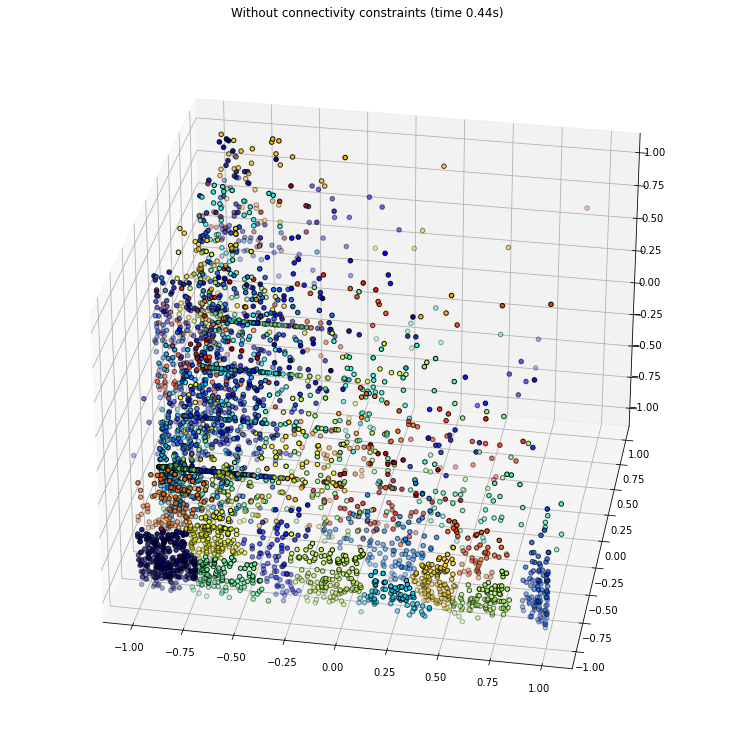

In [1242]:
fig = plt.figure(figsize=(20,10))
ax = p3.Axes3D(fig)
ax.view_init(30, -80)
for l in np.unique(label):
    ax.scatter(normalized_data[label == l, 0], normalized_data[label == l, 1], normalized_data[label == l, 2],
               color=plt.cm.jet(float(l) / np.max(label + 1)),
               s=20, edgecolor='k')
plt.title('Without connectivity constraints (time %.2fs)' % elapsed_time)

#### Na osnovu provere ugla posmatranja, zakljucujemo da se pod uglom od -80 najrelevantnije vidi kako su grupisani klasteri.

## Zakljucak
#### Na osnovu sprovedene analize došli smo do zaključka da su primenom Hierarchical klasterizacije klijenti grupisani u 226 klastera. Ova metoda klasterizacije je razvrstala klijente na još sitnije klastere u odnosu na prethodne dve metode.
#### Primenom Hierarchical klasterizacije Silhouette Coefficient iznosi 0.313.

## 6. Donosenje odluke

### Na osnovu sprovedenog istrazivanja, zakljucujemo da je najrelevantnije da se primeni K means kao metoda klasterizacije, buduci da je Silhouette Coefficient primenom te metode 0.363 i visi je od drugih metoda. A on nam pokazuje koliko nam je metod dobar i koliko su podaci pravilno klasterizovani. Primetili smo da postoji veliki broj klijenata kod kojih je prosao veliki broj dana od poslednje kupovine, savetujemo da obavite poziv sa njima da vidite razlog prekida kupovine. Takodje, postoji veliki broj lojalih kupaca koje mozete da nagradite nekim vidom popusta ili poklona. Dominiraju lojalni kupci u odnosu na neaktivne klijente mozete iskoristiti prihod koji ostvarujete od lojalnih kupaca da bi odobrili neki vid poklona ili popusta za neaktivne klijente kako bi ih ponovo privukli. Lojalnih kupaca ima 1961, novih ima 1369, dok neaktivnih ima 1007.